

```
# This is formatted as code
```

# Assignment 4: Differentiation and optimization

In [1]:
import sympy as sym # symbolic differentiation
import jax          # algorithmic differentiation
import jax.numpy as np
import matplotlib.pyplot as plt

## Question 1: Differentiations

Function 

$$f(a, b) = \frac a b cos(a)^2 \exp \left( - \frac {a^2} {b^2}\right)$$

is given.

1. Derive the partial derivatives of $f(a, b)$ by $a$ and $b$. (Write them in this text)

    $$\frac {\partial f} {\partial a} = \frac{e^{-\frac{a^2}{b^2}}\cos ^2\left(a\right)}{b} - \frac{2a^2e^{-\frac{a^2}{b^2}}\cos^2\left(a\right)}{b^3}-\frac{2e^{-\frac{a^2}{b^2}}\sin\left(a\right)\cos\left(a\right)}{b} $$
   
    $$\frac {\partial f} {\partial b}=a\cos ^2\left(a\right)\left(-\frac{e^{-\frac{a^2}{b^2}}}{b^2}+\frac{2a^2e^{-\frac{a^2}{b^2}}}{b^4}\right) $$
    

2. Implement the derivatives as Python functions:
  1. According to symbolic expressions. (print the expressions)
  2. Using algorithmic differentiation (with `jax`).
      * For a two variable function, $ f(a,b) $, its gradients by $x$ and $y$ can be obtained like this: df_dxy = jax.grad(f, argnums=(0, 1)). The x, and y derivatives are then: df_dxy[0] = df_dx, and df_dxy[1] = df_dy.

$-$

  
Compare the accuracy of symbolic and algorithmic differentiation:


1.   Choose a number of points in the range: $a\in(-20, 20)$, and $b\in(1, 100)$.
2.   Calculate the squared error between simbolic and algorithmic differentiation for each set of points $(a,b)$.
3. Average all the errors. (print the average error obtained)



In [2]:
#Symbolic derivatives expressions :
def expressions():
    a = sym.Symbol('a')
    b = sym.Symbol('b')
    f = (a/b)*((sym.cos(a))**2)*sym.exp(-(a**2/b**2))
    dfda = sym.diff(f, a)
    dfdb = sym.diff(f, b)
    print(f" derivative with importance to a = {dfda}")
    print(f" derivative with importance to b = {dfdb}")
expressions()

#Symbolic derivative function
def Sym_der(a,b):
    der_a = -2*a**2*np.exp(-a**2/b**2)*np.cos(a)**2/b**3 - 2*a*np.exp(-a**2/b**2)*np.sin(a)*np.cos(a)/b + np.exp(-a**2/b**2)*np.cos(a)**2/b
    der_b =  2*a**3*np.exp(-a**2/b**2)*np.cos(a)**2/b**4 - a*np.exp(-a**2/b**2)*np.cos(a)**2/b**2
    ans = (der_a, der_b)
    return ans

#similar to foo from class
def func(a,b):
    x = (a/b) * (np.cos(a)**2)
    y = np.exp(-(a**2)/(b**2))
    output = x*y
    return output

#Algorithmic derivative
def Alg_der():
    der_1=jax.grad(func, 0)
    der_2=jax.grad(func, 1)
    output = (der_1, der_2)
    return output

#Finding the average error
p_List = [(-16.0, 16.0), (-5.0, 7.0), (10.0, 11.0), (3.0, 70.0), (15.0, 12.0), (2.0, 50.0)]
length = len(p_List)
tmp_Error1 = 0
tmp_Error2 = 0
for i in range(length):
  (a,b) = p_List[i]
  tmp_1 = abs((Alg_der()[0](a,b)) - (Sym_der(a,b)[0]))
  tmp_Error1 = tmp_Error1 + tmp_1
  tmp_2 = abs((Alg_der()[1](a,b)) - (Sym_der(a,b)[1]))
  tmp_Error2 = tmp_Error2 + tmp_2
  ans = ((tmp_Error1 / 6) * (tmp_Error2 / 6))
print(f" Average Error = {ans}")
    

 derivative with importance to a = -2*a**2*exp(-a**2/b**2)*cos(a)**2/b**3 - 2*a*exp(-a**2/b**2)*sin(a)*cos(a)/b + exp(-a**2/b**2)*cos(a)**2/b
 derivative with importance to b = 2*a**3*exp(-a**2/b**2)*cos(a)**2/b**4 - a*exp(-a**2/b**2)*cos(a)**2/b**2
 Average Error = 3.469446951953614e-18


3. Plot 
  * $f(a, 10)$, $\frac {\partial f(a, 10)} {\partial a}$ for range $a \in [-20, 20]$, 
  * $f(10, b)$, $\frac {\partial f(10, b)} {\partial b}$ for range $b \in 1, 100$.

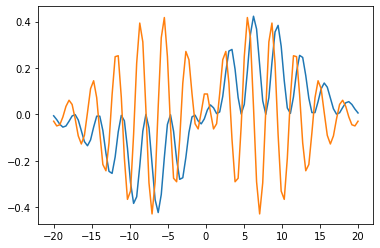

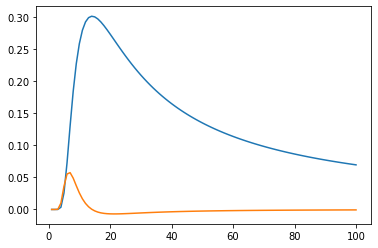

In [3]:
e_1 = jax.grad(func, 0)
x = np.linspace(-20, 20, 100)
y = np.linspace(1, 100, 100)
plt.plot(x, [func(a,10) for a in x], label="")
plt.plot(x, [e_1(a,10) for a in x], label="")
plt.show()
e_2 = jax.grad(func, 1)
plt.plot(y, [func(10,b) for b in y], label="")
plt.plot(y, [e_2(10,b) for b in y], label="")

4. Implement a function for approximate numerical differentiation, given the difference size $h$.

In [4]:
def diff(f, x, h):
  output = f(x+h) - f(x)
  return output / h

5. Find the best difference size $h$ for differentiating
   * $f(3, 10)$ by $a$.
   * $f(1, 1)$ by $b$.

(Print the best step size, the derivative obtained and the difference between the numerical and the exact (algorithmic or symbolic) derivatives)

The best difference size minimizes the error of numerical differentiation relative to the exact differentiation.

Note: In this excercise it is recommended to use gradient descent, however a simple search is also accepted.


In [5]:
def der_sym_a(a,b):
  return -2*a**2*np.exp(-a**2/b**2)*np.cos(a)**2/b**3 - 2*a*np.exp(-a**2/b**2)*np.sin(a)*np.cos(a)/b + np.exp(-a**2/b**2)*np.cos(a)**2/b

def der_sym_b(a,b):
  return 2*a**3*np.exp(-a**2/b**2)*np.cos(a)**2/b**4 - a*np.exp(-a**2/b**2)*np.cos(a)**2/b**2

Alg_der_a = jax.grad(func ,0)
Alg_der_b = jax.grad(func ,1)

def best_diff_a(f, a, b ,h):
  output=f(a+h,b) - f(a,b)
  return output / h
  
def best_diff_b(f, a, b ,h):
  output=f(a,b+h) - f(a,b)
  return output / h

def final_A(a,b):
  output = 0.099
  v = (abs(best_diff_a(der_sym_a, a, b, 0.1) - Alg_der_a(a,b)))
  while (v > (abs(best_diff_a(der_sym_a, a, b, output) - Alg_der_a(a,b)))):
    v = abs(best_diff_a(der_sym_a, a, b, output) - Alg_der_a(a,b))
    output = 0.95 * output
  output = output / 0.95
  return output

def final_B(a,b):
  output = 0.099
  v = (abs(best_diff_b(der_sym_b, a, b, 0.1) - Alg_der_b(a,b)))
  while (v > (abs(best_diff_b(der_sym_b, a, b, output) - Alg_der_b(a,b)))):
    v = abs(best_diff_b(der_sym_b, a, b, output) - Alg_der_b(a,b))
    output = 0.95 * output
  output = output / 0.95
  return output

print(f"Best difference for devriation of a with (a,b)=3,10 is {final_A(3.0,10.0)}")
print(f"Best difference for devriation of b with (a,b)=1,1 is {final_B(1.0,1.0)}")


Best difference for devriation of a with (a,b)=3,10 is 0.0012018914603248738
Best difference for devriation of b with (a,b)=1,1 is 0.10421052631578949


## Question 2: Optimization

### Logistic regression

Logistic regression is a statiscal model that models the probability of an event happening. In binary logistic regression there is a single binary dependent variable coded by '0' or '1'.

We can express the data as a tuple $(x,y)=(data,outcome)=(x,0/1)$

To model the probability of event $x$, we can use the logistic function $p(x)=\frac{1}{1+e^{-(x-\mu)/s}}$.

To find the appropiate $\mu$, that maximizes the classifaction accuracy we minimize the loss function $-\sum_{i=1}^N (y_i \log p(x_i) + (1 - y_i) \log (1 - p(x_i)))$.

In some cases, we give more importance to correctly classify one event over an other (like contracting an illness over not contracting it), and one way to express this is to add a "fixing parameter" in the loss function. One way this can be achieved is by adding weights: $-\sum_{i=1}^N (W_1y_i \log p(x_i) + W_2(1 - y_i) \log (1 - p(x_i)))$.


For a trial group of 20 rats, ratio of time exposed to a virus and the event of contracting that virus are given as a list of pairs (ratio, illness) (1 corresponds to having the illness):

In [6]:
rats = [(0.47, 0), (0.23, 0), (0.86, 1), (0.22, 0), (0.21, 1),
        (0.31, 0), (0.62, 0), (0.941, 1), (0.27, 0), (0.35, 1),
        (0.18, 0), (0.13, 0), (0.31, 1), (0.99, 1), (0.85, 1), 
        (0.35, 1), (0.6, 1), (0.89, 0), (0.6, 1), (0.92, 0)]

We want to predict rat illness based on the ratio of exposure to a virus. The prediction function is

$$illness = ratio \ge threshold.$$

The loss for this _classification_ problem is:

\begin{aligned}
& L = -\sum_{i=1}^N (W_1illness_i \log p_i + W_2(1 - illness_i) \log (1 - p_i)) \\
\mbox{where} & \\
& p_i = \frac 1 {1 + \exp(threshold - ratio_i)}
\\~\\
\mbox{and } &W_{1}, W_{2} \mbox{ are weights}
\end{aligned}

1. Implement the loss as a function of the threshold, and weights.

In [7]:
def loss(thr, w1, w2):
  l = 0
  for pair in rats:
    pi = 1/(1+np.exp(thr-pair[0]))
    l += w1*pair[1]*np.log(pi) + w2*(1-pair[1])*np.log(1-pi)
  return -l

2. Plot the loss and the derivative of the loss by the threshold in the range $threshold \in (0.01, 0.99)$, and $ W_1, W_2 = 1$.

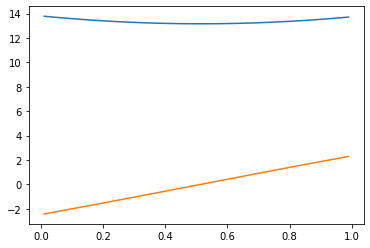

In [8]:
x = np.linspace(0.01, 0.99, 100)
der_l = jax.grad(loss)
plt.plot(x, [loss(a,1,1) for a in x])
plt.plot(x, [der_l(a,1,1) for a in x])
plt.show()

3. Find the best threshold using gradient descent, and $ W_1, W_2$ such that the number of true positives (rats which have the illness and were correctly classified) is greater than $80\%$, but the number of false positives ( rats which dont have the illness and were misclassified) is not $100\%$. (Note: you can fix $W_2$ to be 1)

In [9]:
from random import random
def gd(f,x0,w1=1.2,w2=1,step=0.1,decay=0.995,niter=30): #30 iterations
  df=jax.grad(f)
  x=x0
  for i in range(niter):
    x-=df(x,w1,w2)*step 
    step*= decay
  return x

x = gd(loss, 0.1*(random()-0.5))
print(f"x={x:.3f}")

x=0.337


4. Find the best threshold using Newton's method, given $W_1, W_2$ from previous question. (Newton's method was explained in class). How many iterations were needed?

In [21]:
from random import random
def newton(f, x0, niter=10): #10 iterations
  df = jax.grad(f)
  ddf = jax.grad(df)
  x = x0
  for i in range(niter):
    x = x - df(x,1.2,1)/ddf(x,1.2,1)
  return x

x = newton(loss, 0.1*(random()-0.5))
print(f"x={x:.8f} loss({x:.3f})={loss(x,1.2,1):.3f}")

x=0.33654854 loss(0.337)=14.393


5. Show actual vs. predicted recoveries as a scatter plot for the best threshold. How many recoveries were misclassified?

14 recoveries were misclassified


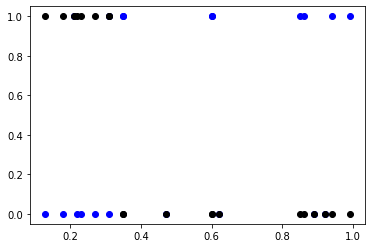

In [20]:
thr = 0.33654854 # best threshold
x = [] 
actual_recoveries = [] 
predicted_recoveries = []
missed_recoveries = 0
i=0
for (ratio,ill) in rats:
  x.insert(i,ratio)
  actual_recoveries.insert(i,ill)
  if ratio > thr:
    predicted_recoveries.insert(i,0)
    illness = 0 
  else:
    predicted_recoveries.insert(i,1)
    illness = 1 
  if illness != ill:
    missed_recoveries = missed_recoveries + 1
  i+=1 

plt.scatter(x,actual_recoveries , color="blue")
plt.scatter(x,predicted_recoveries,color = "black")
print(f"{missed_recoveries} recoveries were misclassified")